In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime


# 6.1.5 Generate Random World Cities

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# output is a zip object in memory
# zip object packs each pair of lats and lngs having the same index in their respective array into a tuple
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

589

# 6.2.6

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f" Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
    pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
 Processing Record 1 of Set 1 | lorengau
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 2 of Set 1 | pevek
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 3 of Set 1 | atuona
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 4 of Set 1 | lavrentiya
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 5 of Set 1 | vila velha
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 6 of Set 1 | san quintin
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 7 of Set 1 | inhambane
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 8

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 12 of Set 2 | kampene
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 13 of Set 2 | punta arenas
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 14 of Set 2 | chardara
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 15 of Set 2 | sardarshahr
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 16 of Set 2 | thompson
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 17 of Set 2 | puerto ayora
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 18 of Set 2 | tiznit
-----------------------------
Data Retrieval Complete      
--------

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 23 of Set 3 | warqla
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 24 of Set 3 | hermanus
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 25 of Set 3 | kudat
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 26 of Set 3 | caravelas
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 27 of Set 3 | shelburne
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 28 of Set 3 | saskylakh
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 29 of Set 3 | bontang
-----------------------------
Data Retrieval Comple

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 34 of Set 4 | puerto montt
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 35 of Set 4 | linqiong
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 36 of Set 4 | flinders
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 37 of Set 4 | asau
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 38 of Set 4 | arlit
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 39 of Set 4 | agadez
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 40 of Set 4 | takoradi
-----------------------------
Data Retrieval Complete      
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 45 of Set 5 | homa bay
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 46 of Set 5 | burriana
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 47 of Set 5 | san cristobal
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 48 of Set 5 | jiddah
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 49 of Set 5 | marcona
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 50 of Set 5 | oktyabrskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 1 of Set 6 | chimbote
----------------

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 7 of Set 7 | acarau
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 8 of Set 7 | melilla
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 9 of Set 7 | okhotsk
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 10 of Set 7 | trairi
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 11 of Set 7 | yulara
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 12 of Set 7 | arraial do cabo
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 13 of Set 7 | imamoglu
-----------------------------
Data Retrieval Complete      
--------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 18 of Set 8 | sao miguel do araguaia
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 19 of Set 8 | great bend
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 20 of Set 8 | nhulunbuy
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 21 of Set 8 | nuuk
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 22 of Set 8 | taoudenni
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 23 of Set 8 | meyungs
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 24 of Set 8 | karratha
-----------------------------
Data 

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 28 of Set 9 | gat
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 29 of Set 9 | bowen
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 30 of Set 9 | belyy yar
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 31 of Set 9 | amazar
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 32 of Set 9 | fenyi
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 33 of Set 9 | tuy hoa
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 34 of Set 9 | louisbourg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 39 of Set 10 | risod
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 40 of Set 10 | beloha
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 41 of Set 10 | hovd
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 42 of Set 10 | shieli
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 43 of Set 10 | marawi
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 44 of Set 10 | avera
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 45 of Set 10 | ambodifototra
City not found. Skipping...
-----------------------------
Data Retrieval Complet

-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 50 of Set 11 | leningradskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 1 of Set 12 | olafsvik
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 2 of Set 12 | miyako
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 3 of Set 12 | vila franca do campo
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 4 of Set 12 | ambon
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 5 of Set 12 | angra
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
 Processing Record 6 of Set 12 | grand gaube
-----------------------------
Data 

-----------------------------
Data Retrieval Complete      
-----------------------------


# Run API request for each of the cities

In [17]:
city_data

[{'City': 'Lorengau',
  'Lat': -2.0226,
  'Lng': 147.2712,
  'Max Temp': 80.94,
  'Humidity': 78,
  'Cloudiness': 63,
  'Wind Speed': 5.59,
  'Country': 'PG',
  'Date': '2021-10-20 16:08:48'},
 {'City': 'Pevek',
  'Lat': 69.7008,
  'Lng': 170.3133,
  'Max Temp': 18.25,
  'Humidity': 94,
  'Cloudiness': 100,
  'Wind Speed': 14.56,
  'Country': 'RU',
  'Date': '2021-10-20 16:08:49'},
 {'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 76.05,
  'Humidity': 84,
  'Cloudiness': 25,
  'Wind Speed': 11.92,
  'Country': 'PF',
  'Date': '2021-10-20 16:08:49'},
 {'City': 'Lavrentiya',
  'Lat': 65.5833,
  'Lng': -171,
  'Max Temp': 24.3,
  'Humidity': 92,
  'Cloudiness': 75,
  'Wind Speed': 6.26,
  'Country': 'RU',
  'Date': '2021-10-20 16:08:50'},
 {'City': 'Vila Velha',
  'Lat': -20.3297,
  'Lng': -40.2925,
  'Max Temp': 67.95,
  'Humidity': 88,
  'Cloudiness': 75,
  'Wind Speed': 11.5,
  'Country': 'BR',
  'Date': '2021-10-20 16:08:50'},
 {'City': 'San Quintin',
  'Lat': 30.48

# Convert the array of dictionaries (city_data) to a DataFrame

In [18]:
city_data_df = pd.DataFrame(city_data)

## Reorder the column so easier to read

In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [20]:
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2021-10-20 16:08:48,-2.0226,147.2712,80.94,78,63,5.59
1,Pevek,RU,2021-10-20 16:08:49,69.7008,170.3133,18.25,94,100,14.56
2,Atuona,PF,2021-10-20 16:08:49,-9.8000,-139.0333,76.05,84,25,11.92
3,Lavrentiya,RU,2021-10-20 16:08:50,65.5833,-171.0000,24.30,92,75,6.26
4,Vila Velha,BR,2021-10-20 16:08:50,-20.3297,-40.2925,67.95,88,75,11.50


# Save the data to CSV

In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# the index label (or column A) header as "City_ID."
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Scatterplot

In [22]:
# Import time module
import time

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
lngs = city_data_df["Lng"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

## Latitude vs. max temperature

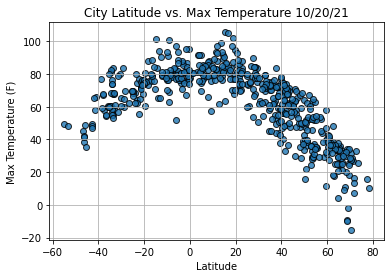

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Latitude vs. humdity

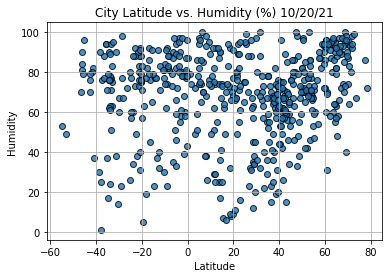

In [24]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

## Latitude vs. cloudiness

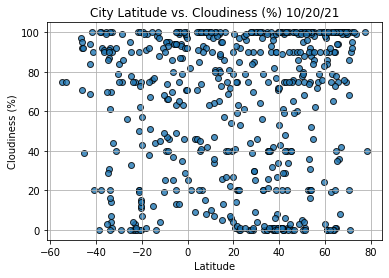

In [25]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

## Latitude vs. windspeed

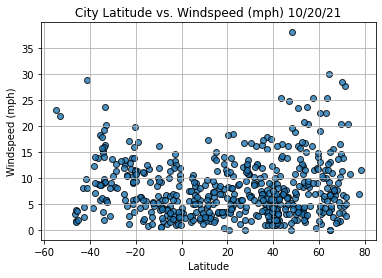

In [26]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Windspeed (mph) "+ time.strftime("%x"))
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

# 6.4.1 Use Linear Regression to Find the Relationship Between Variables

Linear regression is used to find a relationship between a dependent variable and one or more independent variables. The trick is to find something (a dependent variable) that depends on something else (the independent variable) and plot that relationship.


y = mx + b
- y = dependent variable
- m = slope
- x = independent variable
- b = intercept

In [27]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Example plot start

In [47]:
# Create an equal number of latitudes and temperatures.
#lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
#temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
# EXPLANATION
# linregress(x-axes<array>, y-axes<array>)
#   - linregress returns the following
# 0 Slope of the regression line as slope
# 1 y-intercept as intercept
# 2 Correlation coefficient as r_value
# 3 p-value as p_value
# 4 Standard error as std_err

# To exclude a calculation, replace the variable with an underscore in it's place
# Ask: how taxing can these calculations get or WHEN would you want to exclude
# ie: (slope, intercept, _, _, std_err)


# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")
print(f"The r-value is: {r_value:.3f}")
print ("IMPORTANT: In statistics, the p-value is used to determine significance of results.")

y = -0.38x + 70.6
The p-value is: 0.000
The r-value is: -0.586
IMPORTANT: In statistics, the p-value is used to determine significance of results.


# IMPORTANT
### In statistics, the p-value is used to determine significance of results.
### A linear regression with a p-value > 0.05 is not statistically significant.
### A linear regression with a p-value < 0.05 is statistically significant.
### P-values can also be used to justify rejecting a null hypothesis.

Now we can calculate the ideal temperatures (y-values) using the slope and intercept from the equation of the regression line. To do this, perform list comprehension on the latitudes by multiplying each latitude by the slope and adding the intercept.

In [29]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

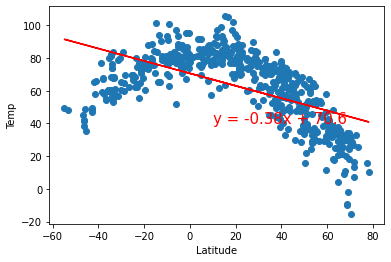

In [31]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

# Example plot end

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

## Create a Linear Regression Function

In [50]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is {r_value}")
    plt.show()

In [40]:
# example
neg = city_data_df[(city_data_df["Lat"] >= 0)]
#neg.head()

In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

## Plot (Max Temp) Northern hemisphere

The r-value is -0.863432868135024


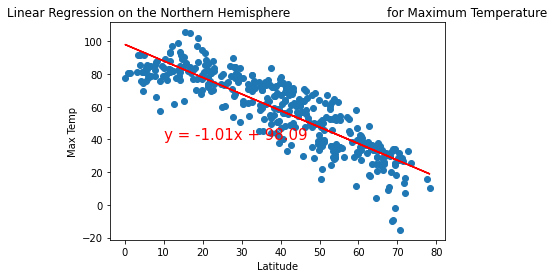

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

## Plot (Max Temp) Southern hemisphere

The r-value is 0.7140074230045517


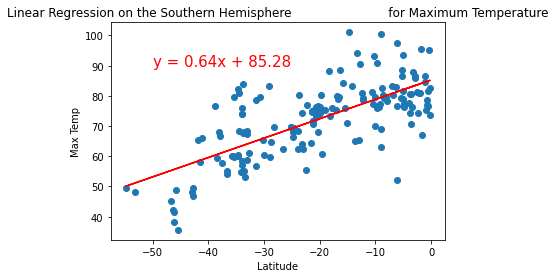

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

## Finding (Max Temp)
The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7(-0.8 for our data) for the Northern Hemisphere and greater than 0.7 (0.71 for our data) for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

## Plot (% Humidity) Northern hemisphere

The r-value is 0.24566070230790982


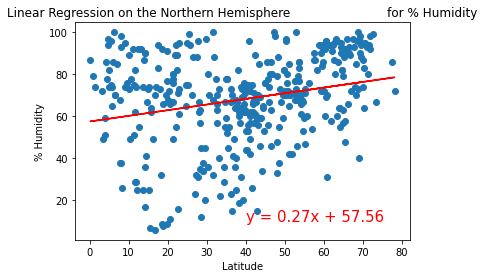

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40, 10))

## Plot (% Humidity) Southern hemisphere

The r-value is 0.09730894509257079


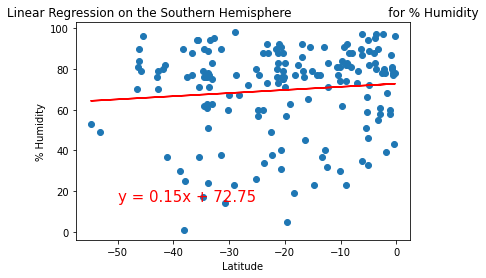

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50, 15))

## Findings (Humidity)

#### From Module
The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

#### From OUR data
Northern r-value = 0.24
Southern r-value = .09

## Plot (Cloudiness) Northern Hemisphere

The r-value is 0.1355958698363631


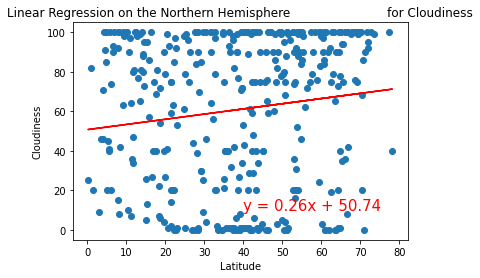

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40, 10))

## Plot (Cloudiness) Southern Hemisphere

The r-value is 0.0778103182936063


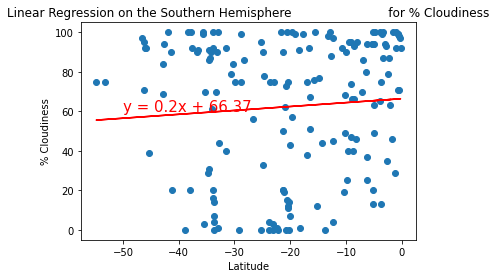

In [62]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50, 60))

## Findings (Cloudiness)

#### From Module
The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

#### From OUR data
Northern r-value = 0.13
Southern r-value = .078

# =========

## Plot (Wind Speed) Northern Hemisphere

The r-value is 0.20560368378517305


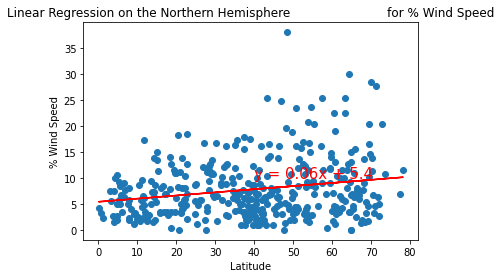

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(40, 10))

## Plot (Wind Speed) Southern Hemisphere

The r-value is -0.3467352743170008


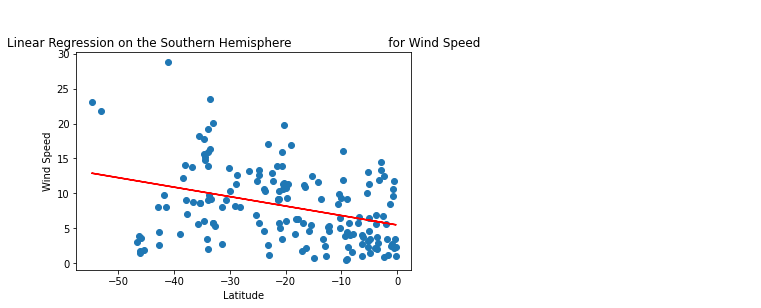

In [67]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40, 35))

## Findings (Wind Speed)

#### From Module
The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 

#### From OUR data
Northern r-value = 0.20
Southern r-value = -0.35